In [2]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import os 

In [2]:
os.getcwd()

'C:\\Users\\Akansha Pruthi\\Downloads'

In [3]:
import pandas as pd

In [4]:
df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [7]:
df.shape

(1525, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [9]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [12]:
df.describe(include = 'object')

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [13]:
df.duplicated().sum()

0

In [14]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Unnamed: 0
[   1    2    3 ... 1523 1524 1525]
vote
['Labour' 'Conservative']
age
[43 36 35 24 41 47 57 77 39 70 66 59 51 79 37 38 53 44 60 56 61 55 62 76
 27 52 48 72 42 54 50 46 33 58 64 32 71 28 34 68 67 88 40 78 65 74 82 49
 84 81 45 69 31 63 89 83 29 92 73 75 26 90 25 80 30 86 85 87 93 91]
economic.cond.national
[3 4 2 1 5]
economic.cond.household
[3 4 2 1 5]
Blair
[4 5 2 1 3]
Hague
[1 4 2 5 3]
Europe
[ 2  5  3  4  6 11  1  7  9 10  8]
political.knowledge
[2 0 3 1]
gender
['female' 'male']


# Univariate Analysis

Text(0.5, 1.0, 'Blair boxplot')

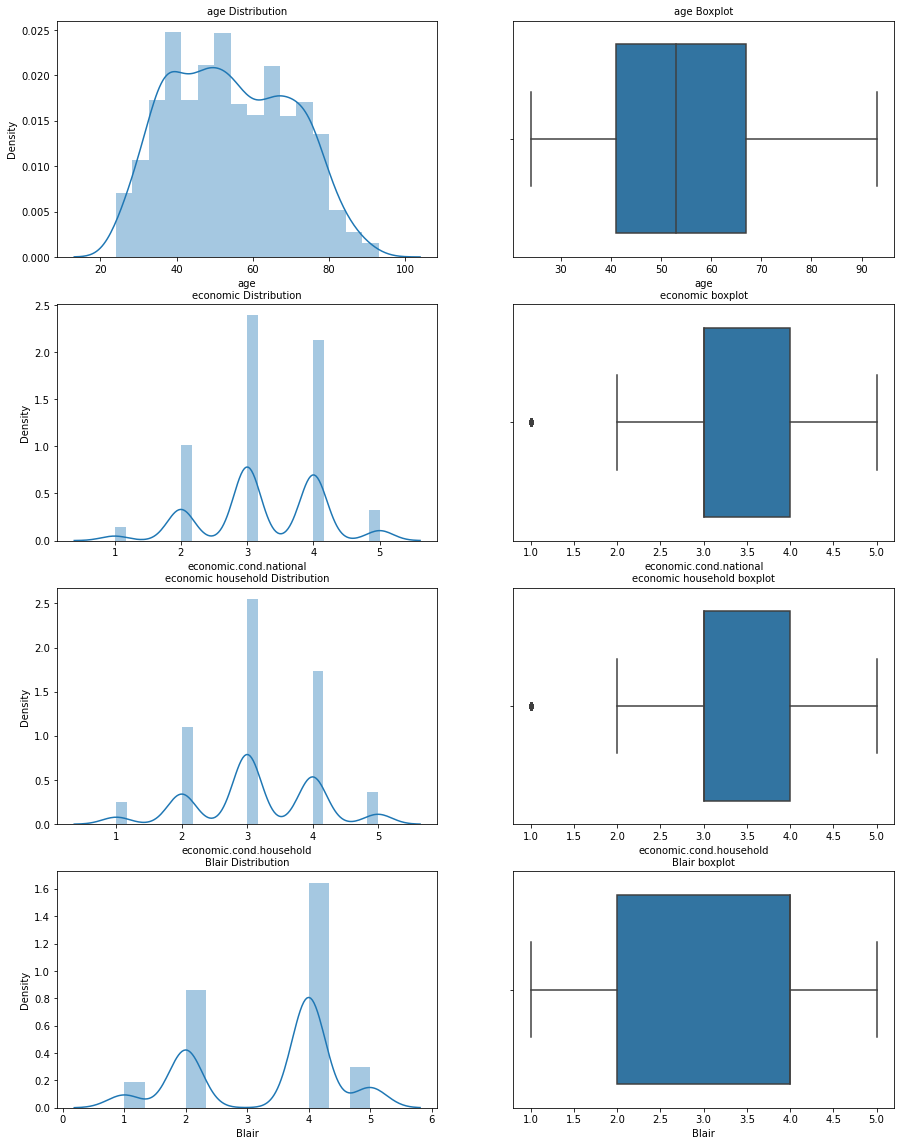

In [20]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)


Text(0.5, 1.0, 'political knowledge boxplot')

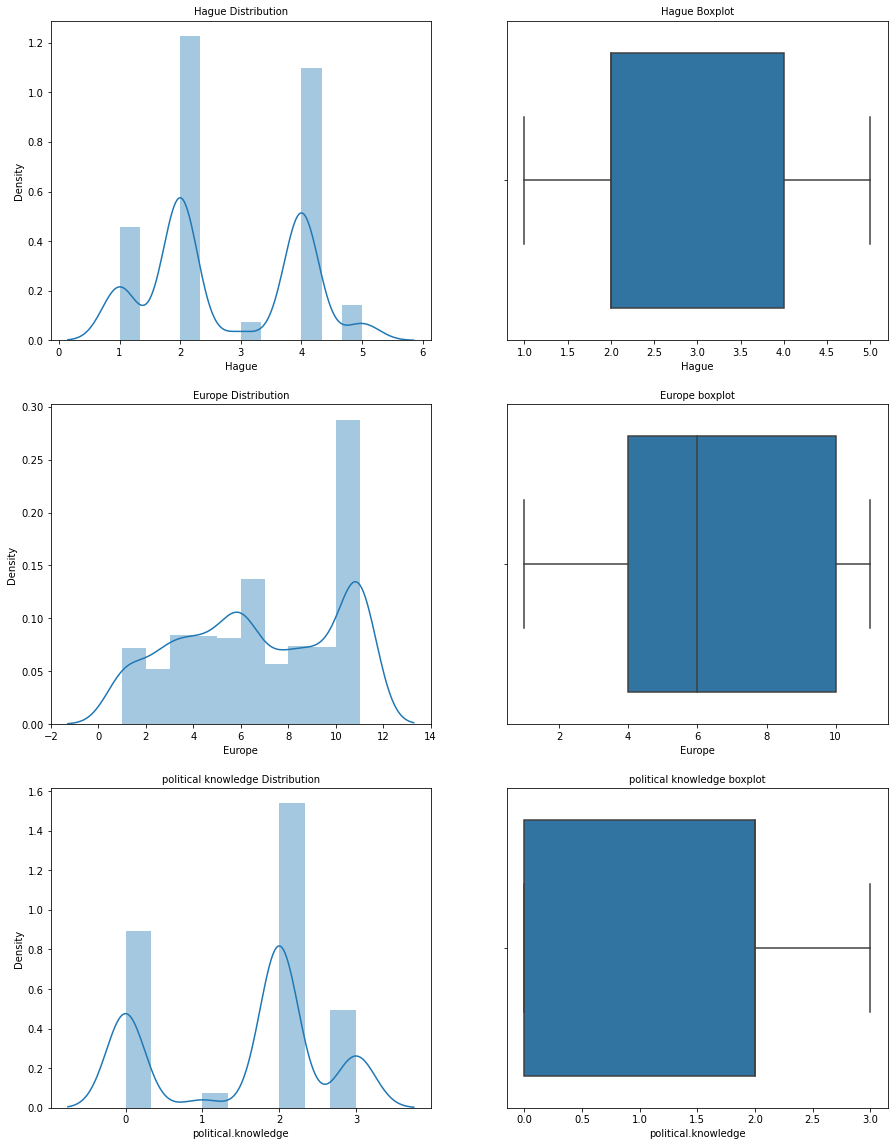

In [22]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

C:\Users\Akansha Pruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akansha Pruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akansha Pruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

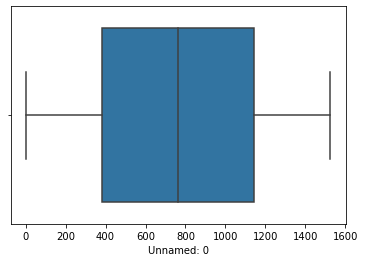

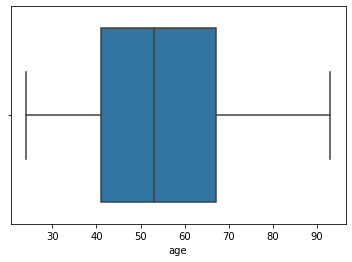

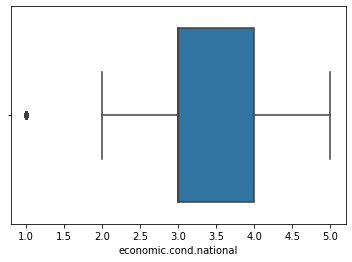

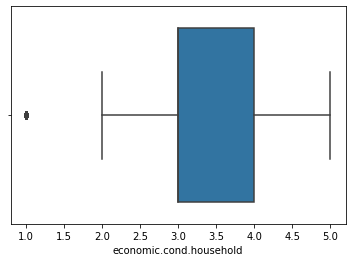

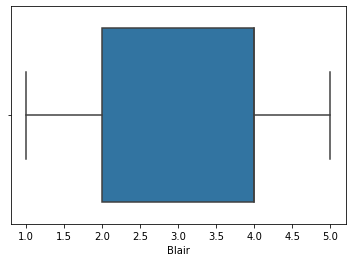

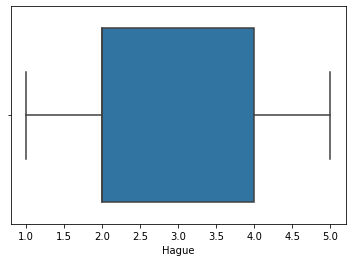

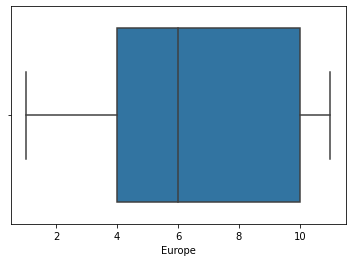

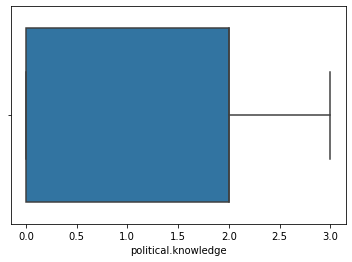

In [15]:

for col in df.select_dtypes(exclude = 'object').columns:
    plt.subplots(1,1)
    sns.boxplot(df[col])

# Bivariate and Multivariate Analysis

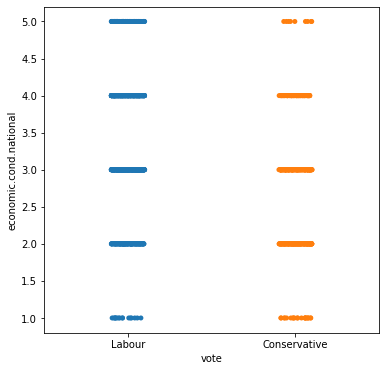

In [24]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

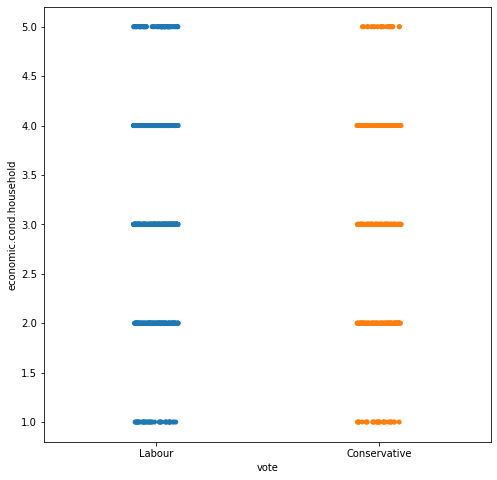

In [26]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"],df['economic.cond.household'], jitter=True) 
plt.show()

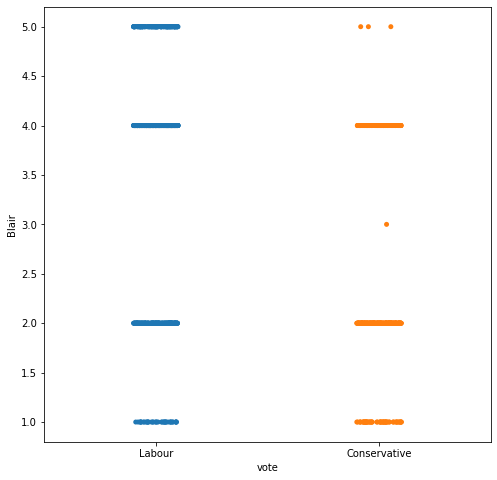

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

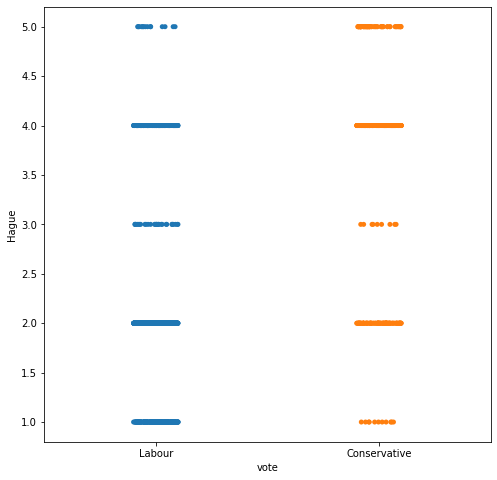

In [28]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"],df['Hague'], jitter=True) 
plt.show()

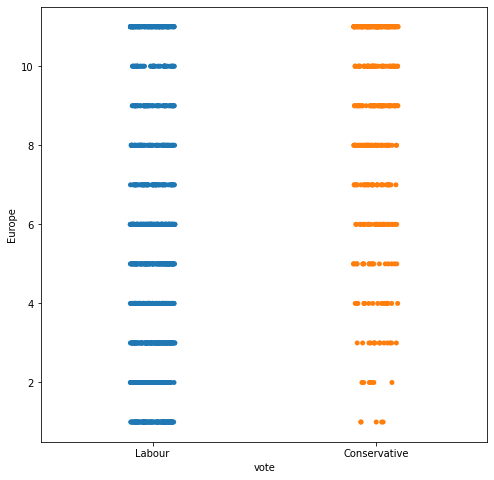

In [29]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"],df['Europe'], jitter=True) 
plt.show()

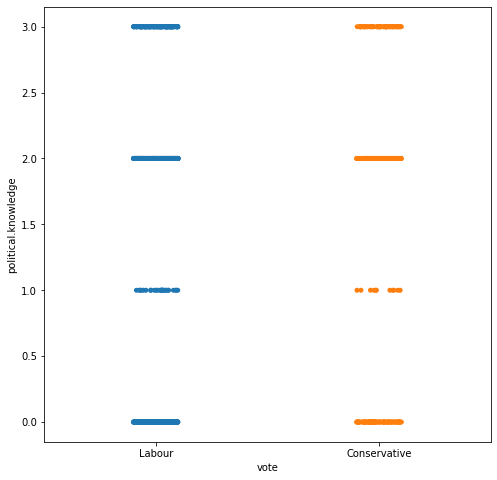

In [30]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"],df['political.knowledge'], jitter=True) 
plt.show()

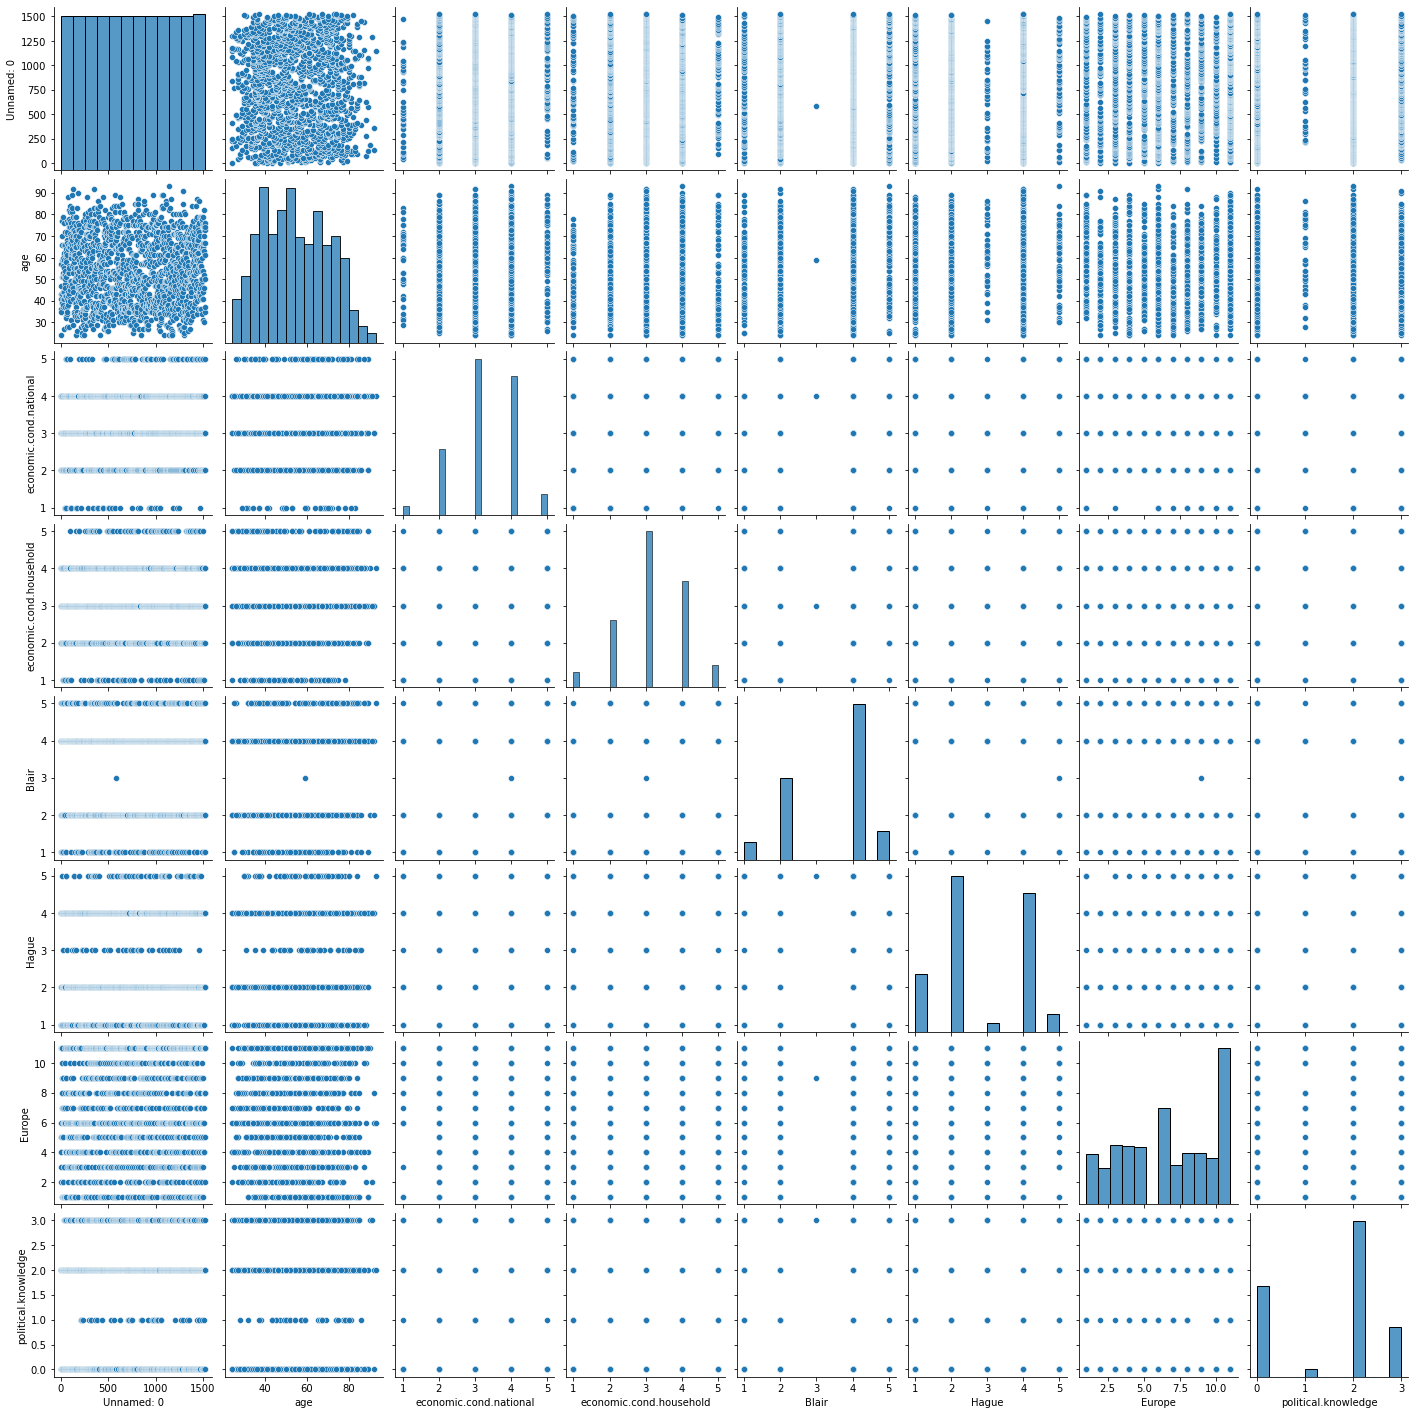

In [32]:
sns.pairplot(df)

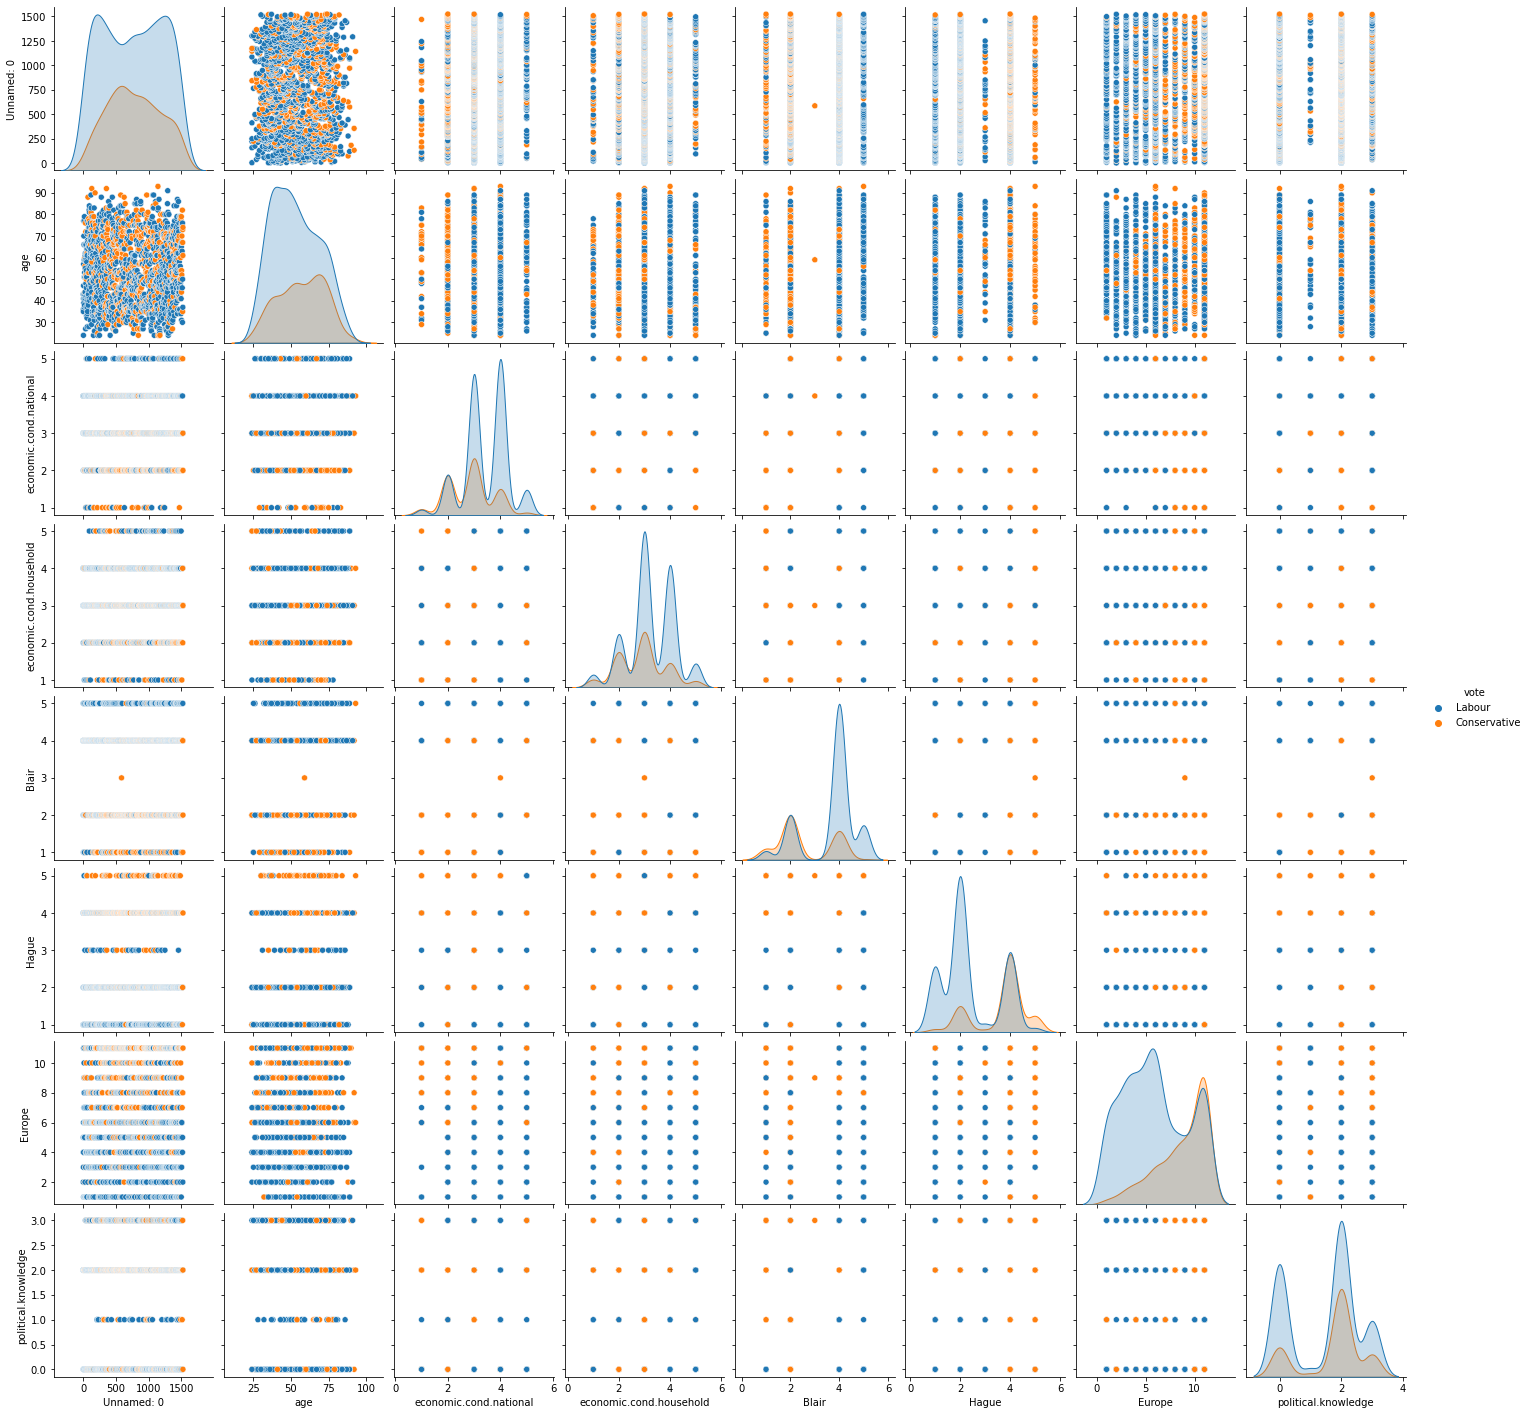

In [33]:
sns.pairplot(df, hue='vote')

<AxesSubplot:xlabel='age', ylabel='vote'>

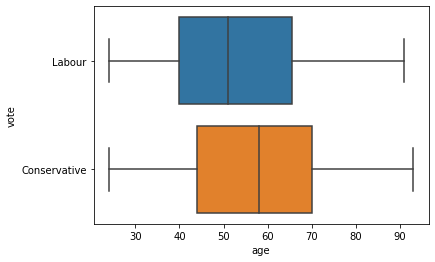

In [34]:
sns.boxplot(x = 'age',y = 'vote', data =df )

<AxesSubplot:>

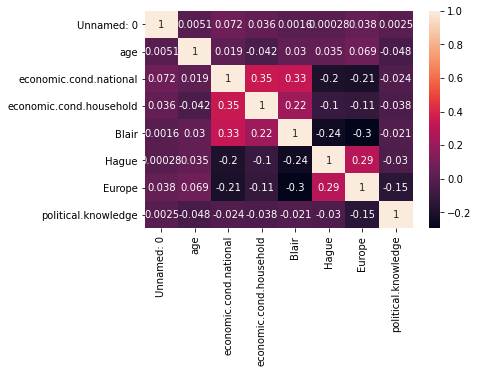

In [35]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

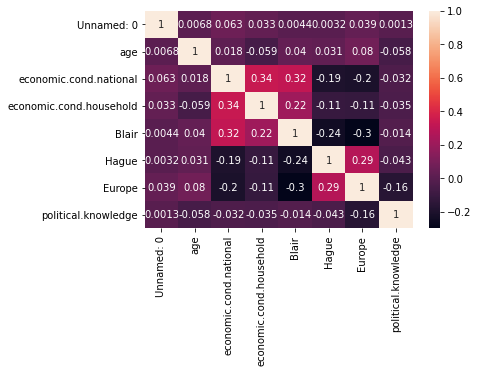

In [36]:
sns.heatmap(df.corr(method = 'spearman'), annot = True)

In [38]:
for feature in df.columns:
    if df[feature].dtype =='object':
        print('\n')
        print('feature:',feature)
        print(pd.categorical(df[feature].unique()))
        print(pd.categorical(df[feature].unique()).codes)
        df[feature] = pd.categorical(df[feature]).codes

In [40]:
df.dtypes

Unnamed: 0                 int64
vote                       int64
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                     int64
dtype: object

In [41]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,1,43,3,3,4,1,2,2,1
1,2,1,36,4,4,4,4,5,2,0
2,3,1,35,4,4,5,2,3,2,0
3,4,1,24,4,2,2,1,4,0,1
4,5,1,41,2,2,1,1,6,2,0


In [37]:
df.vote = df.vote.replace({'Labour': 1, 'Conservative': 0})
df.gender = df.gender.replace({'male': 0, 'female': 1})

LOGISTICS REGRESSION MODEL

In [42]:
X = df.drop(['vote'], axis = 1)
y = df.vote

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [44]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr.fit(X_train, y_train)
ytrain_predict = lr.predict(X_train)
ytest_predict = lr.predict(X_test)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   32.1s finished


In [46]:
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



Text(0.5, 1.0, 'Test Data')

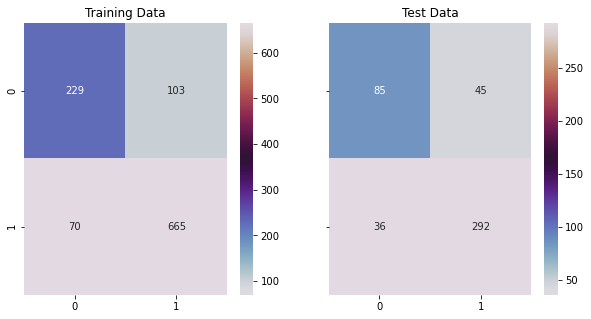

In [47]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [48]:
pred_prob_train = lr.predict_proba(X_train)
pred_prob_test = lr.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.883


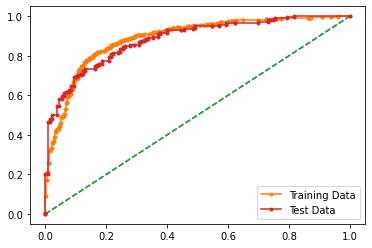

In [49]:
# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LOGISTICS REGRESSION - SCALED VARIABLES

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr.fit(X_train_scaled, y_train)
ytrain_predict = lr.predict(X_train_scaled)
ytest_predict = lr.predict(X_test_scaled)
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.2s finished


In [51]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.391292
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1525
Model:                          Logit   Df Residuals:                     1516
Method:                           MLE   Df Model:                            8
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                  0.3620
Time:                        21:22:25   Log-Likelihood:                -596.72
converged:                       True   LL-Null:                       -935.35
Covariance Type:            nonrobust   LLR p-value:                5.623e-141
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Unnamed: 0               1.214e-05      0.000      0.074      0.941      -0.000   

In [52]:
X_new = df.drop(['vote','age','gender'], axis = 1)
y_new = df.vote
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.30 , random_state=1)
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr.fit(X_train_scaled, y_train)
ytrain_predict = lr.predict(X_train_scaled)
ytest_predict = lr.predict(X_test_scaled)
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.67      0.71       332
           1       0.86      0.90      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


In [54]:
odds = np.exp(lr.coef_[0])
pd.DataFrame(odds, 
             X_new.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Blair,1.918409
economic.cond.national,1.343844
economic.cond.household,1.180267
Unnamed: 0,0.976726
political.knowledge,0.623151
Europe,0.438091
Hague,0.361157


In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',max_iter=10000,penalty='l2',C = 1, verbose=True,n_jobs=2)
lr.fit(X_train_scaled, y_train)
ytrain_predict = lr.predict(X_train_scaled)
ytest_predict = lr.predict(X_test_scaled)
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')

[LibLinear]Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.67      0.71       332
           1       0.86      0.90      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



In [56]:
odds = np.exp(lr.coef_[0])
pd.DataFrame(odds, 
             X_new.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Blair,1.905873
economic.cond.national,1.340687
economic.cond.household,1.178206
Unnamed: 0,0.976859
political.knowledge,0.627618
Europe,0.443256
Hague,0.366194


In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga',max_iter=10000,penalty='l1',C = 0.1, verbose=True,n_jobs=2)
lr.fit(X_train_scaled, y_train)
ytrain_predict = lr.predict(X_train_scaled)
ytest_predict = lr.predict(X_test_scaled)
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 18 epochs took 0 seconds
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.66      0.71       332
           1       0.86      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.63      0.66       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.81      0.82      0.82       458
 



[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.4s finished


In [58]:
odds = np.exp(lr.coef_[0])
pd.DataFrame(odds, 
             X_new.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Blair,1.813888
economic.cond.national,1.285365
economic.cond.household,1.116260
Unnamed: 0,1.000000
political.knowledge,0.687026
Europe,0.484240
Hague,0.398092


### Final Logistics Regression Model

In [59]:
X_new = df.drop(['vote','age','gender'], axis = 1)
y_new = df.vote
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.30 , random_state=1)
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr.fit(X_train_scaled, y_train)
ytrain_predict = lr.predict(X_train_scaled)
ytest_predict = lr.predict(X_test_scaled)
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.67      0.71       332
           1       0.86      0.90      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Test Data')

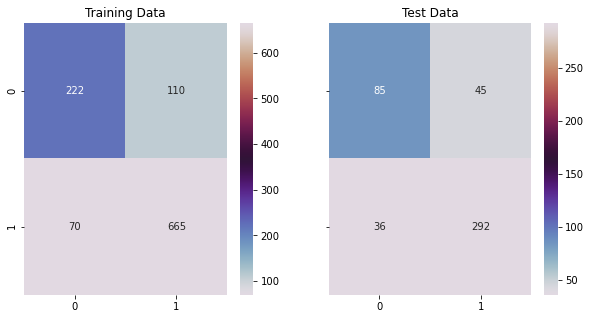

In [61]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')


### LDA MODEL

In [62]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [64]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

Text(0.5, 1.0, 'Test Data')

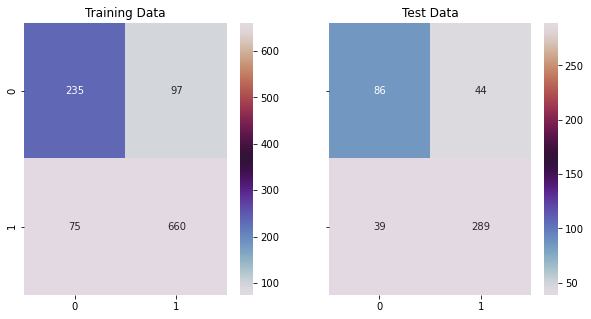

In [65]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')


In [66]:
print('Classification Report of the training data:\n\n',classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



In [67]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


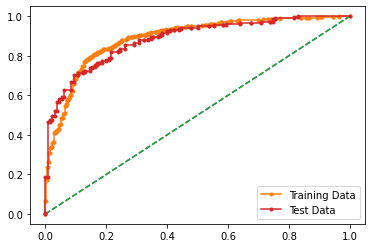

In [68]:
# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [69]:
from sklearn.metrics import f1_score
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(f1_score(Y_train,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.7554
F1 Score 0.8476 

0.2 

Accuracy Score 0.7957
F1 Score 0.8674 

0.3 

Accuracy Score 0.8191
F1 Score 0.8787 

0.4 

Accuracy Score 0.8313
F1 Score 0.883 

0.5 

Accuracy Score 0.8388
F1 Score 0.8847 

0.6 

Accuracy Score 0.8313
F1 Score 0.8757 

0.7 

Accuracy Score 0.8229
F1 Score 0.8655 

0.8 

Accuracy Score 0.7835
F1 Score 0.8249 

0.9 

Accuracy Score 0.6935
F1 Score 0.7264 



### NAIVE BAYES

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Arrange data into independent variables and dependent variables
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target


# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [71]:
NB = GaussianNB()
NB.fit(X_train, y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = NB.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = NB.predict(X_test)

Text(0.5, 1.0, 'Test Data')

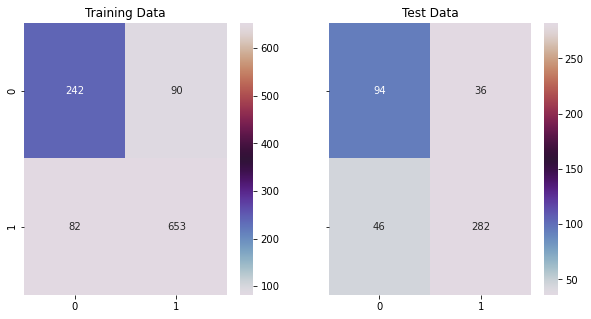

In [72]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')


In [73]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.73      0.74       332
           1       0.88      0.89      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.83      0.82      0.82       458
 



In [74]:
# Training Data Probability Prediction
pred_prob_train = NB.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = NB.predict_proba(X_test)

AUC for the Training Data: 0.888
AUC for the Test Data: 0.886


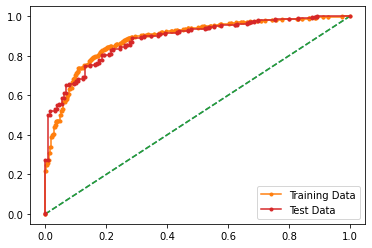

In [75]:
# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### KNN Model

In [76]:
# Arrange data into independent variables and dependent variables
X =  df.drop("vote",axis=1) ## Features
y = df["vote"]  ## Target

In [77]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)


In [78]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(X_train_scaled,y_train)

ytrain_predict = KNN.predict(X_train_scaled)
ytest_predict = KNN.predict(X_test_scaled)
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.81      0.73      0.77       331
           1       0.88      0.92      0.90       736

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.70      0.66      0.68       131
           1       0.87      0.89      0.88       327

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458
 



Text(0.5, 1.0, 'Test Data')

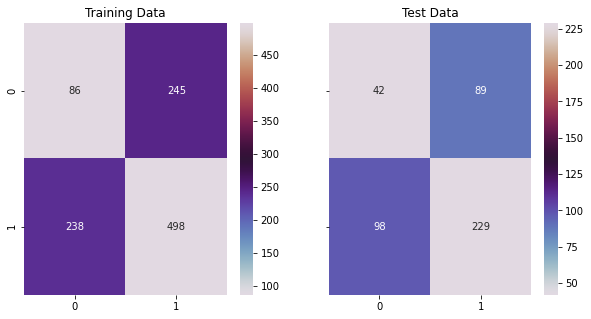

In [80]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

### Hypertuning it

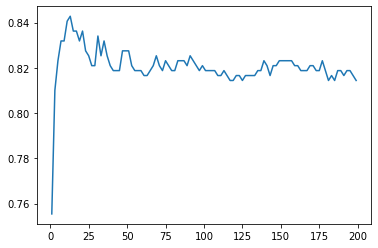

In [81]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,200,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test)
    ac_scores.append(scores)

plt.plot(range(1,200,2), ac_scores)

In [83]:
ac_scores

[0.7554585152838428,
 0.8100436681222707,
 0.8231441048034934,
 0.8318777292576419,
 0.8318777292576419,
 0.8406113537117904,
 0.8427947598253275,
 0.8362445414847162,
 0.8362445414847162,
 0.8318777292576419,
 0.8362445414847162,
 0.8275109170305677,
 0.8253275109170306,
 0.8209606986899564,
 0.8209606986899564,
 0.834061135371179,
 0.8253275109170306,
 0.8318777292576419,
 0.8253275109170306,
 0.8209606986899564,
 0.8187772925764192,
 0.8187772925764192,
 0.8187772925764192,
 0.8275109170305677,
 0.8275109170305677,
 0.8275109170305677,
 0.8209606986899564,
 0.8187772925764192,
 0.8187772925764192,
 0.8187772925764192,
 0.8165938864628821,
 0.8165938864628821,
 0.8187772925764192,
 0.8209606986899564,
 0.8253275109170306,
 0.8209606986899564,
 0.8187772925764192,
 0.8231441048034934,
 0.8209606986899564,
 0.8187772925764192,
 0.8187772925764192,
 0.8231441048034934,
 0.8231441048034934,
 0.8231441048034934,
 0.8209606986899564,
 0.8253275109170306,
 0.8231441048034934,
 0.82096069868

###  Final KNN MOdel

In [84]:
KNN=KNeighborsClassifier(n_neighbors = 175)
KNN.fit(X_train_scaled,y_train)

ytrain_predict = KNN.predict(X_train_scaled)
ytest_predict = KNN.predict(X_test_scaled)
print('Classification Report of the training data:\n\n',classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.58      0.67       331
           1       0.83      0.93      0.88       736

    accuracy                           0.83      1067
   macro avg       0.82      0.76      0.78      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.54      0.63       131
           1       0.84      0.93      0.88       327

    accuracy                           0.82       458
   macro avg       0.80      0.74      0.76       458
weighted avg       0.81      0.82      0.81       458
 



Text(0.5, 1.0, 'Test Data')

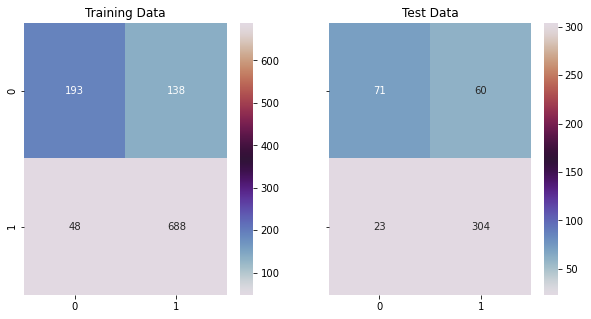

In [85]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [86]:
# Training Data Probability Prediction
pred_prob_train = KNN.predict_proba(X_train_scaled)

# Test Data Probability Prediction
pred_prob_test = KNN.predict_proba(X_test_scaled)

AUC for the Training Data: 0.893
AUC for the Test Data: 0.895


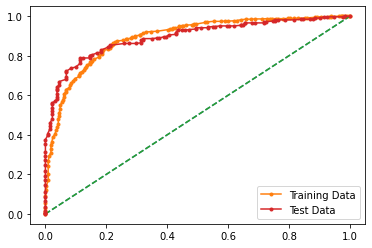

In [87]:
# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Bagging

In [88]:
x = df.drop('vote', axis = 1)
y = df['vote']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)

In [89]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators = 500, random_state = 42, oob_score = True)
dt.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=42)

In [90]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = dt.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = dt.predict(X_test)

Text(0.5, 1.0, 'Test Data')

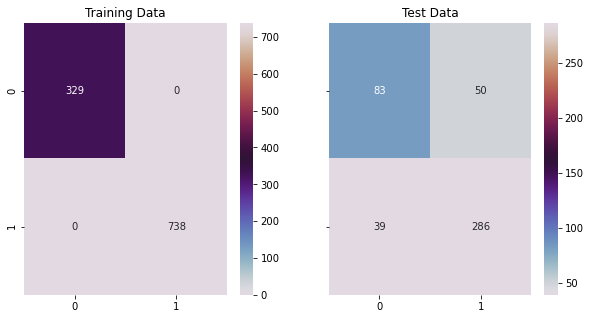

In [91]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [92]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.68      0.62      0.65       133
           1       0.85      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.81      0.80       458
 



### HYPERTUNING

Text(0.5, 1.0, 'Accuracy vs n_estimators')

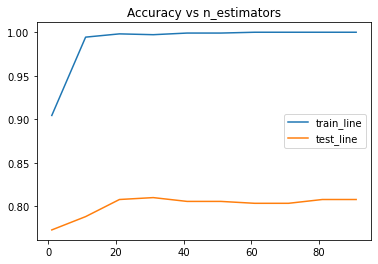

In [93]:
depth = np.arange(1,100, 10)
train_result = []
test_result = []
for i in depth:
    dt = RandomForestClassifier(n_estimators = i)
    dt.fit(X_train, y_train)
    train_result.append(accuracy_score(y_train, dt.predict(X_train)))
    test_result.append(accuracy_score(y_test, dt.predict(X_test)))

line1 = plt.plot(depth, train_result,label = 'train_line')
line2 = plt.plot(depth, test_result,label ='test_line')
plt.legend()
plt.title('Accuracy vs n_estimators')

Text(0.5, 1.0, 'Accuracy vs min_samples_split')

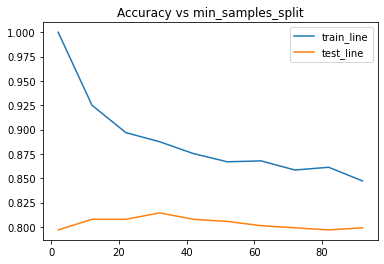

In [94]:
depth = np.arange(2, 100, 10)
train_result = []
test_result = []
for i in depth:
    dt = RandomForestClassifier(min_samples_split = i)
    dt.fit(X_train, y_train)
    train_result.append(accuracy_score(y_train, dt.predict(X_train)))
    test_result.append(accuracy_score(y_test, dt.predict(X_test)))

line1 = plt.plot(depth, train_result,label = 'train_line')
line2 = plt.plot(depth, test_result,label ='test_line')
plt.legend()
plt.title('Accuracy vs min_samples_split')

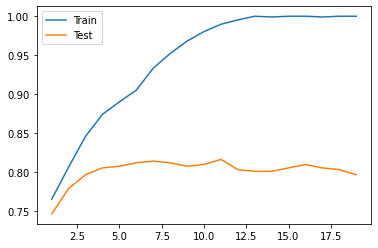

In [95]:
depth = np.arange(1, 20, 1)
train_result = []
test_result = []
for i in depth:
    dt = RandomForestClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    train_result.append(accuracy_score(y_train, dt.predict(X_train)))
    test_result.append(accuracy_score(y_test, dt.predict(X_test)))

line1 = plt.plot(depth, train_result, label = 'Train')
line2 = plt.plot(depth, test_result, label = 'Test')
plt.legend()

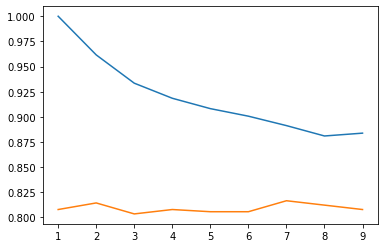

In [96]:
depth = np.arange(1,10,1)
train_result = []
test_result = []
for i in depth:
    dt = RandomForestClassifier(min_samples_leaf = i)
    dt.fit(X_train, y_train)
    train_result.append(accuracy_score(y_train, dt.predict(X_train)))
    test_result.append(accuracy_score(y_test, dt.predict(X_test)))

line1 = plt.plot(depth, train_result)
line2 = plt.plot(depth, test_result)

In [97]:
param_grid = {
    'n_estimators' : [40, 45, 100],
    'max_features': ['sqrt','auto'],
    'min_samples_split': [10,20,30],
    
}

dt = RandomForestClassifier()
grid = GridSearchCV( estimator = dt, param_grid = param_grid, cv = 10)

In [98]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [40, 45, 100]})

In [99]:
dt = grid.best_estimator_
dt

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       n_estimators=45)

In [100]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = dt.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = dt.predict(X_test)

Text(0.5, 1.0, 'Test Data')

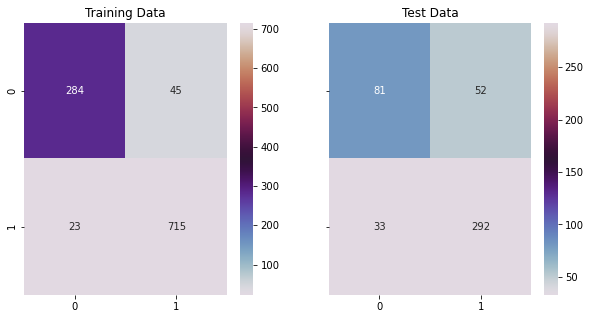

In [101]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [102]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      0.86      0.89       329
           1       0.94      0.97      0.95       738

    accuracy                           0.94      1067
   macro avg       0.93      0.92      0.92      1067
weighted avg       0.94      0.94      0.94      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.71      0.61      0.66       133
           1       0.85      0.90      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458
 



In [103]:
# Training Data Probability Prediction
pred_prob_train = dt.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = dt.predict_proba(X_test)

AUC for the Training Data: 0.985
AUC for the Test Data: 0.881


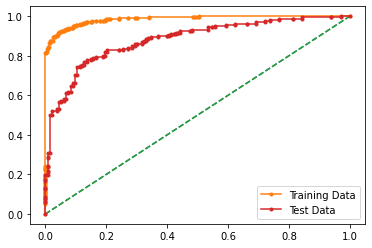

In [104]:
# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [105]:
imp = pd.Series(dt.feature_importances_)
imp.index = X_train.columns
imp.sort_values(ascending = False)

Blair                      0.204445
Hague                      0.200190
Europe                     0.173116
Unnamed: 0                 0.109161
age                        0.105483
political.knowledge        0.078550
economic.cond.national     0.077681
economic.cond.household    0.038204
gender                     0.013170
dtype: float64

### BAGGING

In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [107]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Bagging.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = Bagging.predict(X_test)

In [108]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.64      0.66       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458
 



### HyperTuning 

In [109]:
Bagging = BaggingClassifier()
search_grid={'n_estimators':[500,100,50],'max_features' : [4,5,8]}
search=GridSearchCV(estimator=Bagging,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=10)

In [110]:
search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingClassifier(), n_jobs=1,
             param_grid={'max_features': [4, 5, 8],
                         'n_estimators': [500, 100, 50]},
             scoring='accuracy')

In [111]:
Bagging = search.best_estimator_
Bagging

BaggingClassifier(max_features=5, n_estimators=50)

In [112]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Bagging.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = Bagging.predict(X_test)

In [113]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.53      0.58       133
           1       0.82      0.88      0.85       325

    accuracy                           0.78       458
   macro avg       0.73      0.70      0.71       458
weighted avg       0.77      0.78      0.77       458
 



Text(0.5, 1.0, 'Test Data')

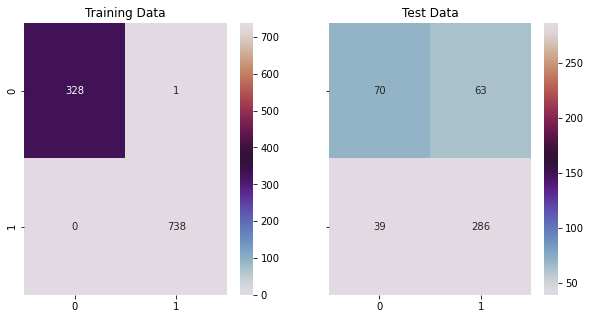

In [114]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

AUC for the Training Data: 1.000
AUC for the Test Data: 0.869


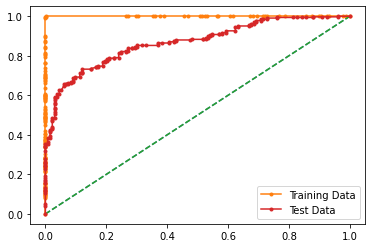

In [115]:
# Training Data Probability Prediction
pred_prob_train = Bagging.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Boosting

In [116]:
from sklearn.ensemble import AdaBoostClassifier

ADB = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [117]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = ADB.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ADB.predict(X_test)

Text(0.5, 1.0, 'Test Data')

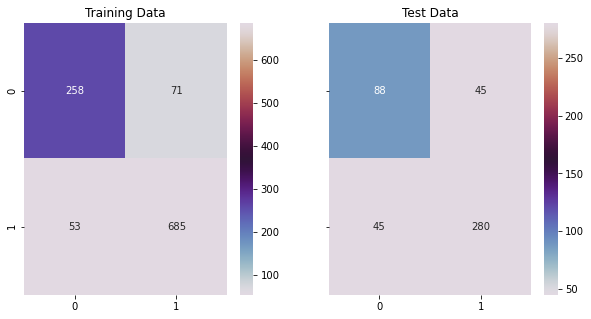

In [118]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

### HYPERTUNING

In [119]:
ADB=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.01,.1,1]}
search=GridSearchCV(estimator=ADB,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=10)

In [120]:
search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [121]:
ADB = search.best_estimator_
ADB

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [122]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = ADB.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ADB.predict(X_test)

Text(0.5, 1.0, 'Test Data')

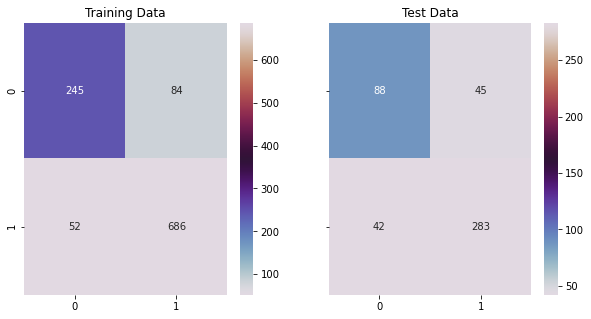

In [123]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [124]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.74      0.78       329
           1       0.89      0.93      0.91       738

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.68      0.66      0.67       133
           1       0.86      0.87      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458
 



AUC for the Training Data: 0.937
AUC for the Test Data: 0.868


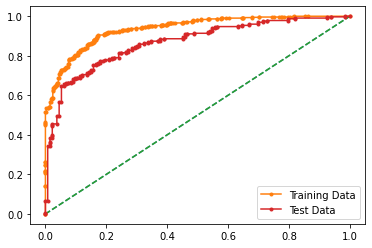

In [125]:
# Training Data Probability Prediction
pred_prob_train = ADB.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=1)
gbc = gbc.fit(X_train, y_train)

In [127]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = gbc.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = gbc.predict(X_test)

Text(0.5, 1.0, 'Test Data')

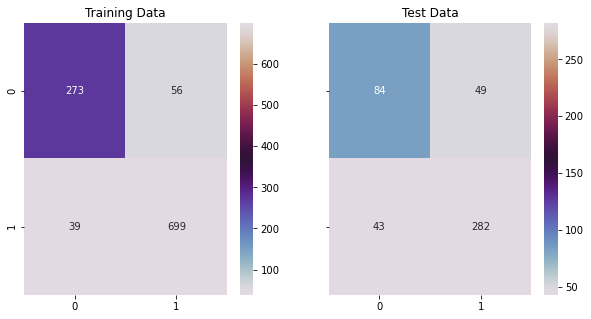

In [128]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [129]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.83      0.85       329
           1       0.93      0.95      0.94       738

    accuracy                           0.91      1067
   macro avg       0.90      0.89      0.89      1067
weighted avg       0.91      0.91      0.91      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.63      0.65       133
           1       0.85      0.87      0.86       325

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458
 



### HYPERTUNING

In [130]:
gbc = GradientBoostingClassifier(random_state=1)
param = {'learning_rate' : [0.01,0.1], 'max_depth' : [6,8], 'n_estimators' : [50,100,500], 'subsample' : [0.95],
         'max_features' : [5,4,8]}
search = GridSearchCV(estimator = gbc, param_grid = param, cv = 10)

In [131]:
search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 8],
                         'max_features': [5, 4, 8],
                         'n_estimators': [50, 100, 500], 'subsample': [0.95]})

In [132]:
gbc = search.best_estimator_
gbc

GradientBoostingClassifier(max_depth=8, max_features=8, n_estimators=500,
                           random_state=1, subsample=0.95)

In [133]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = gbc.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = gbc.predict(X_test)

In [134]:
print('Classification Report of the training data:\n\n',classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.68      0.61      0.64       133
           1       0.85      0.88      0.86       325

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458
 



Text(0.5, 1.0, 'Test Data')

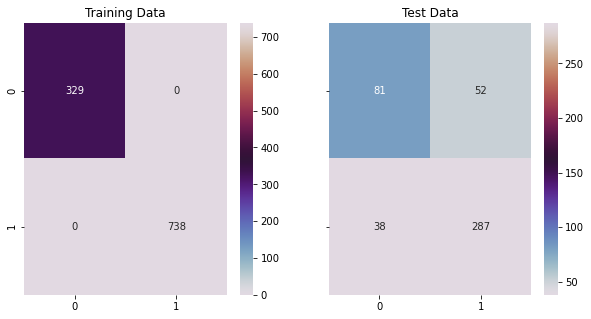

In [135]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize = (10,5))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='twilight',ax=a[0][1]);
a[0][1].set_title('Test Data')

AUC for the Training Data: 1.000
AUC for the Test Data: 0.860


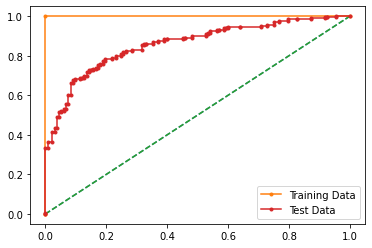

In [136]:
# Training Data Probability Prediction
pred_prob_train = gbc.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbc.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [137]:
imp = pd.Series(gbc.feature_importances_)
imp.index = X_train.columns
imp.sort_values(ascending = False)

Hague                      0.198404
Unnamed: 0                 0.190876
Blair                      0.164893
age                        0.136120
Europe                     0.102859
political.knowledge        0.088740
economic.cond.national     0.059056
economic.cond.household    0.043334
gender                     0.015718
dtype: float64

## QUESTION 2 

In [4]:
import nltk
nltk.download('inaugural')
from nltk.corpus import stopwords 
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package inaugural to C:\Users\Rahul
[nltk_data]     Pruthi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


In [5]:
len(inaugural.fileids())

58

In [6]:
inaugural.fileids()[38], inaugural.fileids()[43], inaugural.fileids()[46]

('1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt')

In [7]:
Roosevelt = inaugural.raw(inaugural.fileids()[38])
Kennedy = inaugural.raw(inaugural.fileids()[43])
Nixon = inaugural.raw(inaugural.fileids()[46])

# Characters

In [8]:
len(Roosevelt)

7571

In [9]:
len(Kennedy)

7618

In [10]:
len(Nixon)

9991

# Words

In [11]:
x = inaugural.raw('1941-Roosevelt.txt')
words = x.split()
print('Number of words in Roosevelt file:', len(words))

Number of words in Roosevelt file: 1360


In [12]:
x = inaugural.raw('1961-Kennedy.txt')
words = x.split()
print('Number of words in Kennedy file:', len(words))

Number of words in Kennedy file: 1390


In [13]:
x = inaugural.raw('1973-Nixon.txt')
words = x.split()
print('Number of words in Nixon file:', len(words))

Number of words in Nixon file: 1819


In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rahul
[nltk_data]     Pruthi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
y=pd.DataFrame({'Text': inaugural.raw('1941-Roosevelt.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x : len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,On each national day of inauguration since 178...,67


In [18]:
y=pd.DataFrame({'Text': inaugural.raw('1961-Kennedy.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x : len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [21]:
y=pd.DataFrame({'Text': inaugural.raw('1973-Nixon.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x : len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


### Removing Stopwords and Punctuations

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rahul
[nltk_data]     Pruthi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
stopwords = nltk.corpus.stopwords.words("english") + list(string.punctuation) + ['--']
R_words = [x.lower() for x in inaugural.words(inaugural.fileids()[38])]
K_words = [x.lower() for x in inaugural.words(inaugural.fileids()[43])]
N_words = [x.lower() for x in inaugural.words(inaugural.fileids()[46])]

In [24]:
R_clean = [x for x in R_words if x not in stopwords]
K_clean = [x for x in K_words if x not in stopwords]
N_clean = [x for x in N_words if x not in stopwords]

### Stemming

In [25]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
R_stemmed = [stemmer.stem(x) for x in R_clean]
K_stemmed = [stemmer.stem(x) for x in K_clean]
N_stemmed = [stemmer.stem(x) for x in N_clean]

In [26]:
nltk.FreqDist(K_stemmed)

FreqDist({'let': 16, 'us': 12, 'power': 9, 'world': 8, 'nation': 8, 'side': 8, 'new': 7, 'pledg': 7, 'ask': 6, 'citizen': 5, ...})

In [27]:
R_freq = [item[0] for item in nltk.FreqDist(R_stemmed).most_common(4)]
K_freq = [item[0] for item in nltk.FreqDist(K_stemmed).most_common(4)]
N_freq = [item[0] for item in nltk.FreqDist(N_stemmed).most_common(4)]
R_freq, K_freq, N_freq

(['nation', 'know', 'peopl', 'spirit'],
 ['let', 'us', 'power', 'world'],
 ['us', 'let', 'america', 'peac'])

In [28]:
R_joined = ' '.join(R_stemmed)
K_joined = ' '.join(K_stemmed)
N_joined = ' '.join(N_stemmed)

In [29]:
!pip install wordcloud

In [30]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.4

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Rahul Pruthi\\AppData\\Local\\Temp\\pip-uninstall-nnvur3lb\\pip.exe'
Consider using the `--user` option or check the permissions.




    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [31]:
from wordcloud import WordCloud

Roosevelt Speech!!


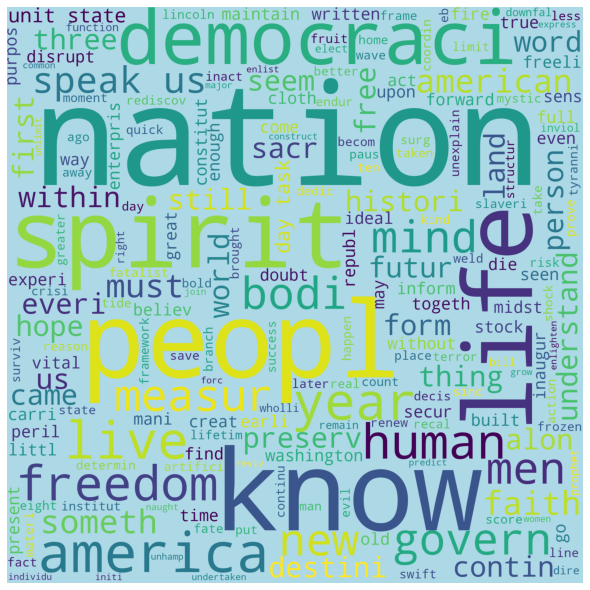

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='lightblue', 
                min_font_size = 10, random_state=100).generate(R_joined)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Roosevelt Speech!!")
plt.show()

Kennedy Speech!!


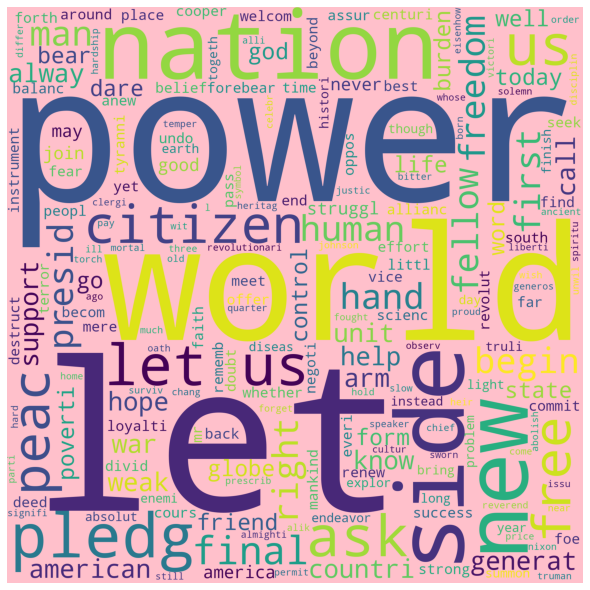

In [33]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='pink', 
                min_font_size = 10, random_state=100).generate(K_joined) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Kennedy Speech!!")
plt.show()

Nixon Speech!!


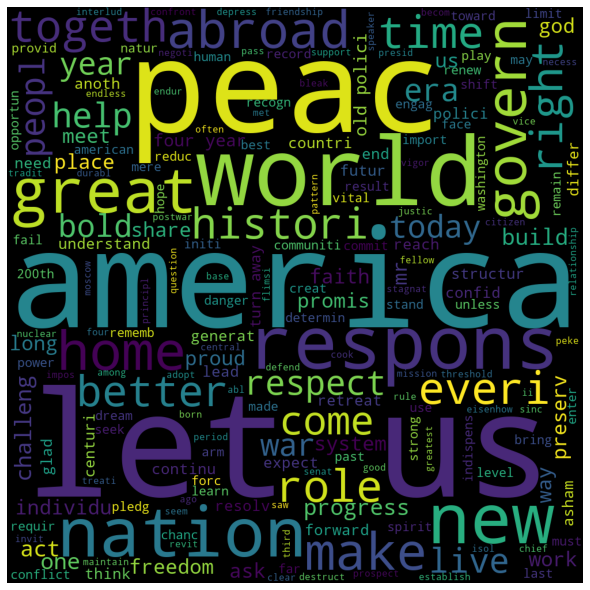

In [34]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(N_joined) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Nixon Speech!!")
plt.show()